In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
plt.rcParams["font.family"] = "serif"

In [2]:
dataset = pd.read_csv('BTS.csv')

In [3]:
print(dataset)

    Set  Temp  Sample Cycle  ...      σm1      σm2  Avg (σm1, σm2)  FR
0     I    25       1     a  ...  0.00000  0.00000         0.00000 NaN
1     I    25       2     a  ...  0.00000  0.00000         0.00000 NaN
2     I    25       3     a  ...  0.00000  0.00000         0.00000 NaN
3     I   250       1     a  ...  0.00000  0.00000         0.00000 NaN
4     I   250       2     a  ...  0.00000  0.00000         0.00000 NaN
..  ...   ...     ...   ...  ...      ...      ...             ...  ..
80  III  1000       2     b  ...  0.21797  0.39261         0.30529 NaN
81  III  1000       2     c  ...  0.21797  0.39261         0.30529 NaN
82  III  1000       3     a  ...  0.27870  0.37902         0.32886 NaN
83  III  1000       3     b  ...  0.27870  0.37902         0.32886 NaN
84  III  1000       3     c  ...  0.27870  0.37902         0.32886 NaN

[85 rows x 9 columns]


In [4]:
X = dataset.iloc[ : , 0:5].values
y = dataset.iloc[ : , -2].values

In [5]:
print(y)

[0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.07093
 0.07093  0.07418  0.07418  0.074325 0.074325 0.188905 0.188905 0.19437
 0.19437  0.197425 0.197425 0.07816  0.07816  0.119745 0.119745 0.872095
 0.872095 0.12395  0.12395  0.60301  0.60301  0.04706  0.04706  0.14284
 0.14284  0.139935 0.139935 1.092115 1.092115 1.092115 1.096785 1.096785
 1.096785 0.619015 0.619015 0.619015 0.87483  0.87483  0.87483  1.2274
 1.2274   1.2274   0.60072  0.60072  0.60072  2.006955 2.006955 2.006955
 0.62671  0.62671  0.62671  1.228225 1.228225 1.228225 1.70816  1.70816
 1.70816  1.45064  1.45064  1.45064  0.42009  0.42009  0.42009  0.30529
 0.30529  0.30529  0.32886  0.32886  0.32886 ]


In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 0] = le.fit_transform(X[:, 0])

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 3] = le.fit_transform(X[:, 3])

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

In [9]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
y_prediction = regressor.predict(X_test)

In [11]:
print(np.concatenate((y_prediction.reshape(len(y_prediction),1), y_test.reshape(len(y_test),1)),1))

[[-0.20681871  0.        ]
 [-0.10477816  0.        ]
 [ 1.09732781  2.006955  ]
 [ 0.19217938  0.139935  ]
 [ 0.89812211  1.096785  ]
 [ 0.59118934  0.119745  ]
 [ 0.84903442  0.619015  ]
 [ 0.76846924  0.42009   ]
 [ 0.95995246  1.2274    ]
 [ 0.95808425  1.092115  ]
 [-0.03541049  0.        ]
 [ 0.36645174  0.197425  ]
 [ 0.20229521  0.12395   ]]


In [12]:
#plt.plot(y_test, color = 'red', label = 'Real data')
#plt.plot(y_prediction, color = 'blue', label = 'Predicted data')
#plt.xlabel('Serial number of data point in test set')
#plt.ylabel('Memory Stress (MPa)')
#plt.title('BTS Prediction')
#plt.legend()
#plt.show()

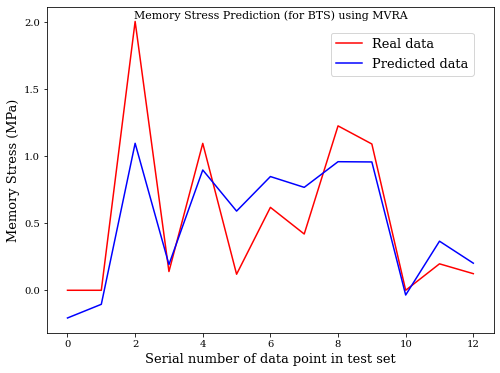

In [13]:
plt.figure(figsize=(8, 6))
plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(y_prediction, color = 'blue', label = 'Predicted data')
plt.xlabel('Serial number of data point in test set', fontsize=13)
plt.ylabel('Memory Stress (MPa)',fontsize=13)
plt.title('Memory Stress Prediction (for BTS) using MVRA', position=(0.5, 0.945),size=11)
plt.legend(bbox_to_anchor=(0.97,0.94), fontsize=13)
plt.savefig("BTS (MVRA)",dpi=1500,bbox_inches = 'tight')
plt.show()

In [14]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,y_prediction)
print('r2 socre is ',score)
print('mean_sqrd_error is==',mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_prediction)))


r2 socre is  0.6964684904138445
mean_sqrd_error is== 0.11118166215844985
root_mean_squared error of is== 0.33343914311077794
